In [1]:
#library(GGally)
library(randomForest)
library(tree)
#library(GauPro)
#library(gam) #doesnt work for gam(...~ s(..., bs = ""))
library(mgcv)
library(boot)
#install.packages("GauPro")
#library(GauPro)


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 

Loading required package: nlme

This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.



In [4]:
AirQualityDirty = read.csv("AirQualityUCI.csv", sep= ";")
AirQuality = AirQualityDirty[!is.na(AirQualityDirty),]
ncol(AirQuality)
AirQuality = AirQuality[-c(16:17)]
AirQuality = AirQuality[!is.na(AirQuality$T),]
AirQuality = na.omit(AirQuality)

[1] 17

In [5]:
AirQuality

,Date,Time,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
2,10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
3,10/03/2004,20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502"
4,10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867"
5,10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"
6,10/03/2004,23.00.00,"1,2",1197,38,"4,7",750,89,1337,96,1393,949,"11,2","59,2","0,7848"
7,11/03/2004,00.00.00,"1,2",1185,31,"3,6",690,62,1462,77,1333,733,"11,3","56,8","0,7603"
8,11/03/2004,01.00.00,1,1136,31,"3,3",672,62,1453,76,1333,730,"10,7","60,0","0,7702"
9,11/03/2004,02.00.00,"0,9",1094,24,"2,3",609,45,1579,60,1276,620,"10,7","59,7","0,7648"


In [6]:
AirQuality$CO.GT. = as.numeric(gsub(",", ".", AirQuality$CO.GT))

In [7]:
AirQuality$C6H6.GT. = as.numeric(gsub(",", ".", AirQuality$C6H6.GT.))
AirQuality$T = as.numeric(gsub(",", ".", AirQuality$T))
AirQuality$RH = as.numeric(gsub(",", ".", AirQuality$RH))
AirQuality$AH = as.numeric(gsub(",", ".", AirQuality$AH))

In [8]:
AirQuality = AirQuality[-c(1:2)]

In [9]:
ncol(AirQuality)

[1] 13

In [10]:
AirQuality

,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
6,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
7,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
8,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
9,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648


library(boot)
glm.fit = glm(T ~ -RH - AH, data = AirQuality)
cv.err = cv.glm(AirQuality, glm.fit)
cv.err$delta

#summary(lm.fit)

In [11]:
dim(AirQuality)

[1] 9357   13

train = sample(1:nrow(AirQuality), nrow(AirQuality)/2)
set.seed(1)
bag.AirQual = randomForest(T ~ ., data = AirQuality, subset = train, mtry = (ncol(AirQuality)-1), importance = TRUE)

bag.AirQual

AirQual.test = AirQuality[-train, -(ncol(AirQuality)-1)]
AirQual.train = AirQuality[train, -(ncol(AirQuality)-1)]
yhat.bag = predict(bag.AirQual, newdata = AirQuality[-train,])
plot(yhat.bag, AirQual.test$T, xlim = c(0,50),ylim = c(0,50))
abline(0,1)
mean((yhat.bag - AirQual.test$T)^2)

importance(bag.AirQual)

varImpPlot(bag.AirQual)

gam.ns1 = lm(T ~ ns(CO.GT., 4) + ns(C6H6.GT., 5) + NOx.GT., data = AirQuality)

In [12]:
#gam.s1 = gam(T ~ s(CO.GT., 4) + s(C6H6.GT.,5) + NOx.GT., bs = "gp", data = AirQuality)

In [13]:
#plot(gam.s1, se = T, col = "blue")

In [14]:
#plot.Gam(gam.s1, se = TRUE, col = "red")

gam.m1 = gam(T ~ s(CO.GT., 4, bs = "gp") + s(NOx.GT.), bs = "gp", data = AirQuality)
gam.m2 = gam(T ~ NOx.GT. + s(C6H6.GT.,5) + CO.GT., bs = "gp" , data = AirQuality)
anova(gam.s1, gam.m1, gam.m2, test = "F")
summary(gam.m2)

In [37]:
gam.m1 = gam(T ~ s(CO.GT., bs = "gp"), data = AirQuality)
gam.m2 = gam(T ~ s(NOx.GT., bs = "gp") , data = AirQuality)
gam.m3 = gam(T ~ s(C6H6.GT., bs = "gp") , data = AirQuality)
#gam.m4 = gam(T ~ s(C6H6.GT., CO.GT., bs = "gp") , data = AirQuality) this does not work lol
gam.m4 = gam(T~ s(C6H6.GT., bs = "gp") + s(NOx.GT., bs = "gp") + s(CO.GT., bs = "gp"), data = AirQuality)

In [16]:
anova(gam.m1, gam.m2, gam.m3, test = "F")
summary(gam.m1)
print("bing")
summary(gam.m2)
print("bing")
summary(gam.m3)

,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9353.036,17299298.3,NA,NA,NA,NA
2,9345.276,16979022.4,7.760078,320275.8,22.71703,9.048719e-34
3,9348.519,631441.7,-3.243529,16347580.8,NA,NA



Family: gaussian 
Link function: identity 

Formula:
T ~ s(CO.GT., bs = "gp")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.7783     0.4446   21.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
            edf Ref.df     F p-value    
s(CO.GT.) 2.805  2.964 30.73  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Rank: 6/12
R-sq.(adj) =  0.0091   Deviance explained = 0.94%
GCV = 1850.3  Scale est. = 1849.6    n = 9357

[1] "bing"



Family: gaussian 
Link function: identity 

Formula:
T ~ s(NOx.GT., bs = "gp")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.7783     0.4406   22.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df     F p-value    
s(NOx.GT.) 10.42  10.72 24.68  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.0267   Deviance explained = 2.77%
GCV =   1819  Scale est. = 1816.8    n = 9357

[1] "bing"



Family: gaussian 
Link function: identity 

Formula:
T ~ s(C6H6.GT., bs = "gp")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.77831    0.08496   115.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value    
s(C6H6.GT.) 6.548  7.481 33313  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.964   Deviance explained = 96.4%
GCV = 67.592  Scale est. = 67.538    n = 9357

In [17]:
#Looks like C6H6 is most significant for independent variable on T

set.seed(1)
deltas = rep(0,10)
for (i in 1:10)
    {
    fit = gam(T ~ s(CO.GT., i) + s(NOx.GT.), bs = "gp", data = AirQuality)
    deltas[i] = cv.gam(AirQuality, fit, K = 10)$delta[1]
}
#s(x, z, bs= "gp", k = 50, m = c(3, 0.175))

In [19]:
summary(gam.m3)


Family: gaussian 
Link function: identity 

Formula:
T ~ s(C6H6.GT., bs = "gp")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.77831    0.08496   115.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value    
s(C6H6.GT.) 6.548  7.481 33313  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.964   Deviance explained = 96.4%
GCV = 67.592  Scale est. = 67.538    n = 9357

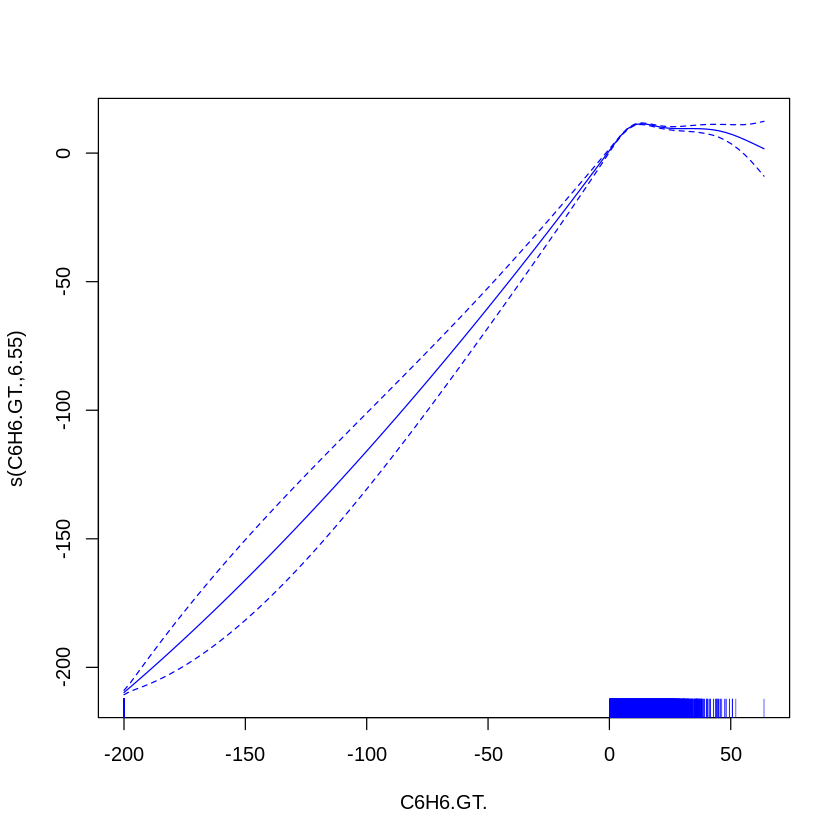

In [21]:
plot(gam.m3, se = TRUE, col = "blue")

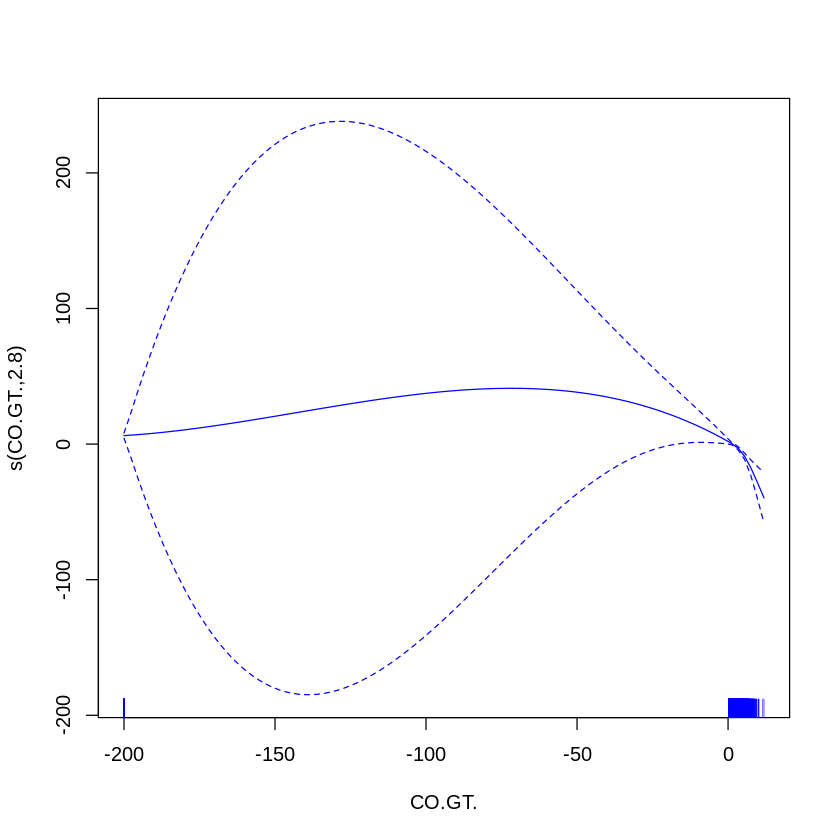

In [23]:
plot(gam.m1, se = TRUE, col = "blue")

In [25]:
#Absolutely no clue what this is doing

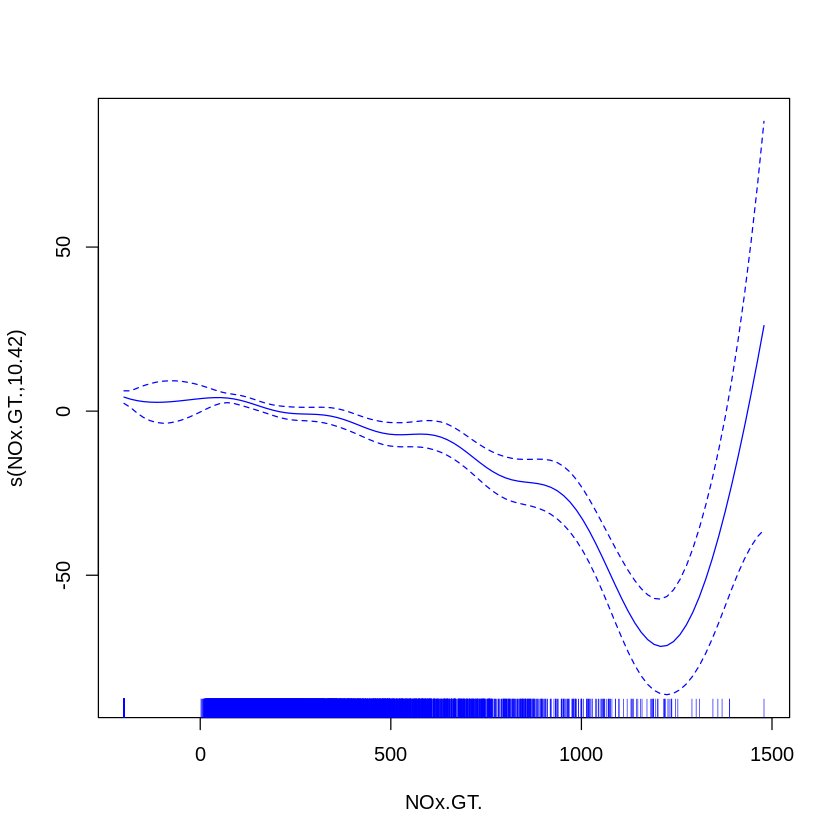

In [24]:
plot(gam.m2, se = TRUE, col = "blue")

In [26]:
#Very interesting

In [ ]:
k = gam(T ~ ., data = AirQuality)

In [ ]:
k

In [ ]:
str(AirQuality)

In [ ]:
plot.Gam(k, se = TRUE, col = "blue")

In [ ]:
attr(bs(AirQuality$CO.GT., df = 6), "knots")

In [ ]:
fit = lm(T ~ bs(CO.GT., c(0.6,1.5,2.6)), data = AirQuality)

In [ ]:
fit

In [ ]:
fit.1 = gam(T ~ s(CO.GT., 4), data = AirQuality)

In [ ]:
plot.Gam(fit.1, se = TRUE, col = "blue")

In [ ]:
fit.1

In [ ]:
plot.Gam(fit, se = TRUE, col =  "red")

In [ ]:
plot.Gam(fit.1, se = TRUE, col =  "red")

In [ ]:
fit.2 = lm(T ~ ns(AirQuality$CO.GT., df = 4), data = AirQuality)

In [ ]:
Tlims = range(AirQuality$T)
T.grid = seq(from = Tlims[1], to = Tlims[2])
pred.2 = predict(fit.2, newdata = list(T = T.grid), se = T)
#pred.2
#T.grid

In [ ]:
plot(T.grid, pred.2$fit.2, lwd = 2)
#lines(T.grid, pred.2$fit.2 + 2*pred.2$se, lty = "dashed")
#lines(T.grid, pred.2$fit.2 - 2*pred.2$se, lty = "dashed")
fit.3 = smooth.spline(AirQuality$T, AirQuality$CO.GT., cv = FALSE)

In [ ]:
fit.3$df

In [ ]:
plot(AirQuality$T, AirQuality$CO.GT., cex = .5, col = "darkgrey")
lines(fit.3, col = "red", lwd = 2)

In [ ]:
anova(fit, fit.1, fit.2, fit.3, test = "F")

In [ ]:
summary(fit.1)